In [1]:
import os
import Levenshtein as lev
from fuzzywuzzy import fuzz
import pandas as pd
import numpy as np

In [7]:
os.chdir(r"E:/ADB_Project/github/adb-jobs-analysis/src")

In [9]:
import ocr_extraction

In [10]:
text = ocr_extraction.extract_bulk(r"E:/ADB_Project/data/cs_sample_ocr")
ocr_df = pd.DataFrame(text, columns=["vacancy_id", "file_path", "ocrd_text"])
ocr_df.head(3)

In [13]:
ocr_df["vacancy_id"] = pd.to_numeric(ocr_df.vacancy_id, downcast='integer')

In [14]:
tdf = pd.read_csv(r"E:/ADB_Project/github/adb-jobs-analysis/data/ImageTransrciptions.csv")

In [16]:
tdf.head()

,image_id,transcribed_text
0,590492,We have opportunities for:\n.Net Architect\nRe...
1,600087,iOS DEVELOPER\nS. A. Knowledge Services (SAKS)...
2,601828,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...
3,601838,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...
4,602009,Senior Software Engineer - Java\nOur client wh...


### Merge OCR output dataframe with Hand-Transcribed File

df = ocr_df.merge(tdf, left_on='vacancy_id', right_on='image_id')

In [18]:
df.head()

,vacancy_id,file_path,ocrd_text,image_id,transcribed_text
0,590492,E:/ADB_Project/data/cs_sample_ocr/590492.jpg,Net Architect\n\n8+ years of Hands on experien...,590492,We have opportunities for:\n.Net Architect\nRe...
1,600087,E:/ADB_Project/data/cs_sample_ocr/600087.png,\n\niOS DEVELOPER\n\nS.A. Knowledge Services ...,600087,iOS DEVELOPER\nS. A. Knowledge Services (SAKS)...
2,601828,E:/ADB_Project/data/cs_sample_ocr/601828.jpg,(M\n\nMOBIZZ\nWE UNDERSTAND\n= People\n]@ss Jo...,601828,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...
3,601838,E:/ADB_Project/data/cs_sample_ocr/601838.jpg,ps\n\nWE UNDERSTAND\n= People\n\n]@ss Job Oppo...,601838,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...
4,602009,E:/ADB_Project/data/cs_sample_ocr/602009.jpg,Senior Software Engineer - Java\n\nOur client ...,602009,Senior Software Engineer - Java\nOur client wh...


In [23]:
#Create token Sort Ration Column
df["tsr"] = df.apply(lambda x: fuzz.token_sort_ratio(x["ocrd_text"], x["transcribed_text"]), axis=1)

In [24]:
df.head()

,vacancy_id,file_path,ocrd_text,image_id,transcribed_text,tsr
0,590492,E:/ADB_Project/data/cs_sample_ocr/590492.jpg,Net Architect\n\n8+ years of Hands on experien...,590492,We have opportunities for:\n.Net Architect\nRe...,80
1,600087,E:/ADB_Project/data/cs_sample_ocr/600087.png,\n\niOS DEVELOPER\n\nS.A. Knowledge Services ...,600087,iOS DEVELOPER\nS. A. Knowledge Services (SAKS)...,99
2,601828,E:/ADB_Project/data/cs_sample_ocr/601828.jpg,(M\n\nMOBIZZ\nWE UNDERSTAND\n= People\n]@ss Jo...,601828,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...,100
3,601838,E:/ADB_Project/data/cs_sample_ocr/601838.jpg,ps\n\nWE UNDERSTAND\n= People\n\n]@ss Job Oppo...,601838,MOBIZZ\nWE UNDERSTAND\nRIGHT\nPeople\nJob Oppo...,99
4,602009,E:/ADB_Project/data/cs_sample_ocr/602009.jpg,Senior Software Engineer - Java\n\nOur client ...,602009,Senior Software Engineer - Java\nOur client wh...,96


In [28]:
df[df["tsr"]>80].shape[0]

25

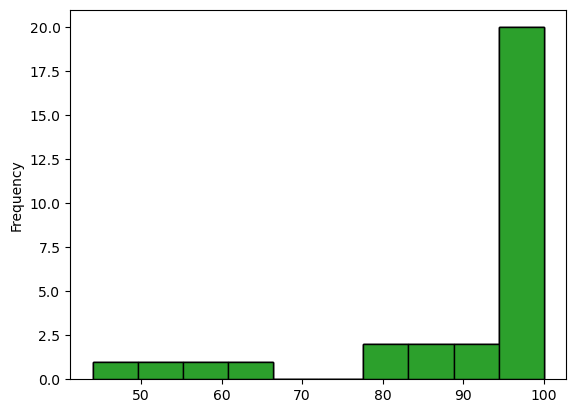

In [27]:
import matplotlib.pyplot as plt
df['tsr'].plot(kind='hist', edgecolor='black')
plt.show()